In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 5/creditcard.csv')

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Data cleaning

In [5]:
dataset.shape

(284807, 31)

In [6]:
pd.isnull(dataset).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
columns = dataset.columns.tolist()
target = 'Class'
state = np.random.RandomState(40)
X = dataset.drop('Class', axis=1)
Y = dataset[target]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [9]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

#Under-sampling

Text(0.5, 1.0, 'Class Distribution')

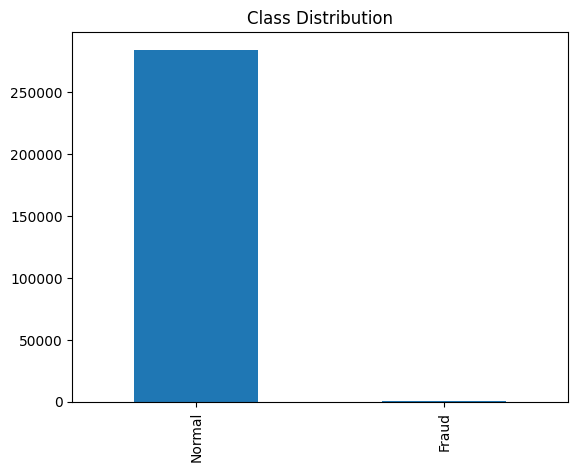

In [10]:
dataset['Class'].value_counts().plot(kind = 'bar')
LABELS = ['Normal', 'Fraud']
plt.xticks(range(2), LABELS)

plt.title('Class Distribution')

In [11]:
Normal= dataset[dataset['Class']==0]
Fraud= dataset[dataset['Class']==1]

In [12]:
Normal.shape

(284315, 31)

In [13]:
Fraud.shape

(492, 31)

In [14]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res, y_res = nm.fit_resample(X,Y)

In [15]:
x_res.shape, y_res.shape

((984, 30), (984,))

#Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.33,random_state=40)

In [17]:
print(x_res_train)

         Time        V1        V2        V3        V4        V5        V6  \
319  155567.0  1.937721 -0.145271 -0.662504  1.199185  0.310307  0.849005   
304  143461.0 -0.207944  0.746563 -0.207661 -0.840131  1.286237 -0.327344   
843  109298.0 -1.000611  3.346850 -5.534491  6.835802 -0.299803  0.095951   
157  155552.0 -2.519505  1.780496  0.225344 -1.382153 -0.378763 -0.103991   
318  143461.0 -5.529117  5.258983 -4.832853 -1.209038 -1.290105 -0.564256   
..        ...       ...       ...       ...       ...       ...       ...   
440   35928.0 -4.577792  3.286186 -2.727602 -2.802649  0.895885  2.870152   
165   77167.0  1.251399  0.379576  0.312806  0.691200 -0.332972 -1.061326   
7     76864.0 -1.685739  0.801152  1.339788 -1.014196  1.336578  0.184959   
219   76837.0  1.113587 -0.049533  1.206524  1.344525 -0.791151  0.173822   
326  155517.0 -1.482612  0.028515  1.842572 -1.001149  1.194603 -0.620270   

           V7        V8        V9  ...       V20       V21       V22  \
319

In [18]:
print(y_res_test)

275    0
239    0
652    1
71     0
42     0
      ..
360    0
787    1
594    1
414    0
299    0
Name: Class, Length: 325, dtype: int64


#Trainig the dataset

In [19]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_res_train,y_res_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model performance

In [20]:
from sklearn.metrics import classification_report, accuracy_score
y_res_pred = model_lr.predict(x_res_test)
print(classification_report(y_res_test, y_res_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       162
           1       0.96      0.93      0.95       163

    accuracy                           0.95       325
   macro avg       0.95      0.95      0.95       325
weighted avg       0.95      0.95      0.95       325



In [21]:
accuracy_score(y_res_test, y_res_pred)

0.9476923076923077